In [6]:
from functions import *
import matplotlib.pyplot as plt
from PIL import Image,ImageDraw,ImageOps
import PIL

In [7]:
PIL.__version__

'8.2.0'

In [ ]:
#createSamples(target_dir=, sample_size=, samples=, thickness_range=, fibers_range=)

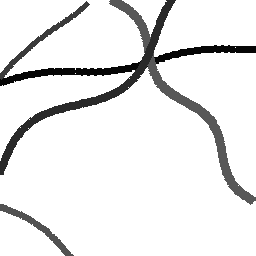

In [8]:
sample = FiberSample(256,256,printout=False)

waves = sample.createRandomWaves(5)

pil_img = Image.new('RGB', (256,256), 'white')
draw = ImageDraw.Draw(pil_img)
#print(waves)
np_image = np.zeros((256,256,3), np.uint8)

#drawFibers(image, waves, 5, 10)
for wave in waves:
    diameter = randint(5, 10)
    gray = randint(0,100)
    draw.line(wave, fill=(gray, gray, gray), width=diameter, joint='curve')
    
    wave = np.array(wave).astype(int)
    wave = wave.reshape((-1,1,2))
    cv2.polylines(np_image,[wave],False,(255,255,255),diameter,cv2.LINE_AA)
    

pil_img

In [9]:
pil_img.save("_sample_seg.png")

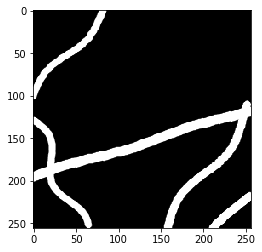

In [8]:
plt.imshow(np_image)
plt.show()

In [9]:
'''
def createSegmentationSamples(samples_number=500, samples_dir='data_segmentation', samples_size=(256,256)):
      for i in range(samples_number):
            print('create sample ', i)
            sample = FiberSample(sample_size[0], sample_size[1], printout=False)
            #sample.
            
            
            sample.saveSegmentationSample(samples_dir, i, extension='png')
'''        

In [5]:
sample = FiberSample(256,256,printout=False)
imgs_dir = 'data_segmentation/images'
masks_dir = 'data_segmentation/masks'
initDirectory(imgs_dir)
initDirectory(masks_dir)

for i in range(500):
    sample.setFibers((3,10))
    sample.setDiameters((3,15))
    sample.createSegmentationSample()
    sample.saveSegmentationSample(imgs_dir, masks_dir, i)